In [149]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [134]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [135]:
# TEST - review the columns on the measurement table using the inspect method 
inspector = inspect(engine)
Measurement_columns = inspector.get_columns('measurement')
for c in Measurement_columns:
    print(c)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


## D1: Determine the Summary Statistics for June

In [136]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june = "06"
june_temp_table = session.query(Measurement.date,Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == june)
#print(june_temp_table)

In [137]:
#TEST#
# 1. Import the sqlalchemy extract function.
#from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
#june = "06"
#june_temp_table = session.query(Measurement.date,Measurement.tobs).\
    #filter(func.strftime("%m", Measurement.date) == june).all()
#print(june_temp_table)

In [138]:
#  3. Convert the June temperatures to a list.
june_temp_table_list = []
for date in june_temp_table:
    #print(date)
    june_temp_table_list.append(date)
print(june_temp_table_list)

, ('2017-06-09', 80.0), ('2017-06-13', 81.0), ('2017-06-14', 78.0), ('2017-06-15', 77.0), ('2017-06-16', 78.0), ('2017-06-19', 78.0), ('2017-06-20', 77.0), ('2017-06-21', 76.0), ('2017-06-22', 81.0), ('2017-06-23', 76.0), ('2017-06-26', 82.0), ('2017-06-27', 80.0), ('2017-06-28', 80.0), ('2017-06-29', 79.0), ('2017-06-30', 74.0), ('2010-06-01', 69.0), ('2010-06-02', 70.0), ('2010-06-03', 67.0), ('2010-06-04', 70.0), ('2010-06-05', 73.0), ('2010-06-06', 73.0), ('2010-06-09', 72.0), ('2010-06-10', 72.0), ('2010-06-11', 77.0), ('2010-06-12', 70.0), ('2010-06-13', 78.0), ('2010-06-15', 73.0), ('2010-06-17', 75.0), ('2010-06-18', 70.0), ('2010-06-19', 74.0), ('2010-06-20', 77.0), ('2010-06-22', 69.0), ('2010-06-23', 73.0), ('2010-06-24', 73.0), ('2010-06-25', 74.0), ('2010-06-28', 73.0), ('2010-06-29', 72.0), ('2010-06-30', 75.0), ('2011-06-08', 73.0), ('2011-06-09', 76.0), ('2011-06-12', 74.0), ('2011-06-13', 76.0), ('2011-06-14', 73.0), ('2011-06-15', 76.0), ('2011-06-16', 76.0), ('2011-0

In [139]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp_table,columns=['date','tobs'])
june_temp_df.head()

,date,tobs
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [140]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<function matplotlib.pyplot.show(close=None, block=None)>

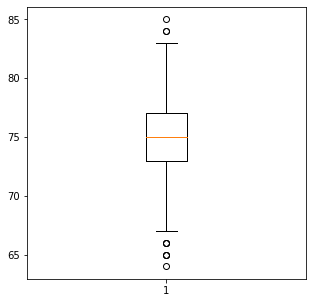

In [153]:
#Test creating a box and wiskers graph
fig = plt.figure(figsize = (5,5))
plt.boxplot(june_temp_df['tobs'])
plt.show

## D2: Determine the Summary Statistics for December

In [141]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december = "12"
december_temp_table = session.query(Measurement.date,Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == december).all()
print(december_temp_table)

, ('2010-12-08', 67.0), ('2010-12-09', 76.0), ('2010-12-10', 68.0), ('2010-12-13', 69.0), ('2010-12-14', 71.0), ('2010-12-15', 70.0), ('2010-12-16', 68.0), ('2010-12-17', 66.0), ('2011-12-01', 69.0), ('2011-12-02', 69.0), ('2011-12-05', 71.0), ('2011-12-06', 72.0), ('2011-12-07', 69.0), ('2011-12-08', 72.0), ('2011-12-09', 70.0), ('2011-12-12', 76.0), ('2011-12-13', 69.0), ('2011-12-14', 71.0), ('2011-12-15', 72.0), ('2011-12-16', 71.0), ('2012-12-03', 78.0), ('2012-12-04', 73.0), ('2012-12-05', 74.0), ('2012-12-06', 68.0), ('2012-12-07', 71.0), ('2012-12-10', 76.0), ('2012-12-11', 75.0), ('2012-12-12', 74.0), ('2012-12-13', 73.0), ('2012-12-14', 73.0), ('2012-12-27', 74.0), ('2012-12-28', 69.0), ('2013-12-02', 74.0), ('2013-12-03', 72.0), ('2013-12-04', 70.0), ('2013-12-05', 67.0), ('2013-12-06', 69.0), ('2013-12-09', 73.0), ('2013-12-10', 75.0), ('2013-12-11', 74.0), ('2013-12-12', 72.0), ('2013-12-13', 71.0), ('2013-12-16', 67.0), ('2013-12-17', 74.0), ('2013-12-18', 70.0), ('2013-1

In [145]:
# 7. Convert the December temperatures to a list.
# ".all()" statement at the end of the "december_temp_table" query makes the query a list
print(type(december_temp_table))

<class 'list'>


In [146]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temp_df = pd.DataFrame(december_temp_table,columns=['date','tobs'])
december_temp_df.head()

,date,tobs
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [147]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temp_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<function matplotlib.pyplot.show(close=None, block=None)>

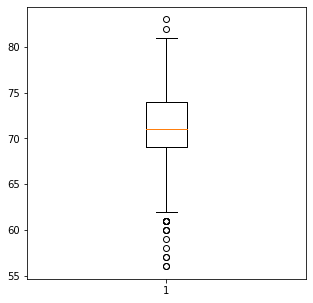

In [152]:
#Test creating a box and wiskers graph
fig = plt.figure(figsize = (5,5))
plt.boxplot(december_temp_df['tobs'])
plt.show

In [158]:
#TEST - precipitation during those two months. 
#december
december_rain_table = session.query(Measurement.date,Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == december).all()
#june
june_rain_table = session.query(Measurement.date,Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == june).all()
print(december_rain_table)    
print(june_rain_table)

 None), ('2016-06-15', 0.02), ('2016-06-16', 0.1), ('2016-06-17', 0.38), ('2016-06-20', 0.1), ('2016-06-21', None), ('2016-06-22', None), ('2016-06-23', None), ('2016-06-24', None), ('2016-06-27', None), ('2016-06-28', None), ('2016-06-29', None), ('2016-06-30', None), ('2017-06-02', None), ('2017-06-05', None), ('2017-06-06', None), ('2017-06-07', None), ('2017-06-08', None), ('2017-06-09', None), ('2017-06-13', None), ('2017-06-14', None), ('2017-06-15', None), ('2017-06-16', None), ('2017-06-19', None), ('2017-06-20', None), ('2017-06-21', None), ('2017-06-22', 0.0), ('2017-06-23', 0.0), ('2017-06-26', None), ('2017-06-27', 0.0), ('2017-06-28', 0.0), ('2017-06-29', 0.0), ('2017-06-30', 0.12), ('2010-06-01', None), ('2010-06-02', 0.03), ('2010-06-03', 0.0), ('2010-06-04', 0.0), ('2010-06-05', 0.0), ('2010-06-06', 0.0), ('2010-06-09', None), ('2010-06-10', 0.0), ('2010-06-11', 0.0), ('2010-06-12', 0.0), ('2010-06-13', 0.01), ('2010-06-15', None), ('2010-06-17', 0.0), ('2010-06-18', 0.

In [160]:
# Create DF with December & June rain data. 
december_rain_df = pd.DataFrame(december_rain_table,columns=['date','rain'])
june_rain_df = pd.DataFrame(june_rain_table,columns=['date','rain'])
december_rain_df.head()

,date,rain
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00


In [161]:
june_rain_df.head()

,date,rain
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00


In [164]:
print(f'December Rain Data')
print(december_rain_df.describe())
print(f'--------')
print(f'June Rain Data')
print(june_rain_df.describe())

December Rain Data
              rain
count  1405.000000
mean      0.216819
std       0.541399
min       0.000000
25%       0.000000
50%       0.030000
75%       0.150000
max       6.420000
--------
June Rain Data
              rain
count  1574.000000
mean      0.136360
std       0.335731
min       0.000000
25%       0.000000
50%       0.020000
75%       0.120000
max       4.430000
